# Introducrtion to Machine Learning: Assignment #1
## Submission date: 28\5\2024, 23:59.
### Topics:
- Naïve bayes
- Gaussian Bayes
- Parzen Windows
- KNN

Submitted by:

 Aseel shaheen 212393532

 Elias Badaan 212804694

 קיבלנו הרכת זמן משרון בלי באישור בלי הורדת נקודות.  

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Customizing Colab
This is an optional section for you convenience:<br/>
Go to Tools -> Settings -> editor<br/>
There, you can adjust fonts, add line numbers, change indentations.

## Question 1 - Bayesian Classification Assuming Gaussian distribution
You are requested by the Central Bank of America to detect between three types of bankotes: fake, fine, and good. The dataset consists of 5 features which were obtained from the digitized images of banknotes.<br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.




import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv

In [ ]:

#load the wine dataset from the given url https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv
url = 'https://sharon.srworkspace.com/ml/datasets/hw1/banknote_authentication.csv'
df = pd.read_csv(url)
print(df.shape)
df.head(3)

(600, 6)


,contrast,skew,curtosis,heat,cent_col,Class
0,2.446909,2.702995,0.832495,0.531505,-1.734316,0
1,0.870104,2.248493,-1.496408,1.383379,-1.216271,0
2,-1.930227,-2.708964,1.031232,-0.125341,0.683788,2


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features (without target label!), using plotting for data frames. <br/>
Should gaussian bayes work here? <br/>
<font color='red'>Write here your answer and explain it</font>
<br><font color='red'>Answer:</font><br/>  

<br/>
<font color='red'>After plotting the density plots, we can see that the features skew ,contrast ,cent_col and curtosis look like they are following a gaussian distribution becuse they have a single peak and the data is centered around the peak.
The heat feature apperas less like a gaussian distribution compared to the other feautres because it has two diffrent peaks.
gaussian bayes classifier assumes that the data is normally distributed, so the features that are normally distributed will work well with the classifier.
most of the features are normally distributed even the distribution of heat is close to a normal distribution,so the gaussian bayes classifier will work well with the dataset.</font>


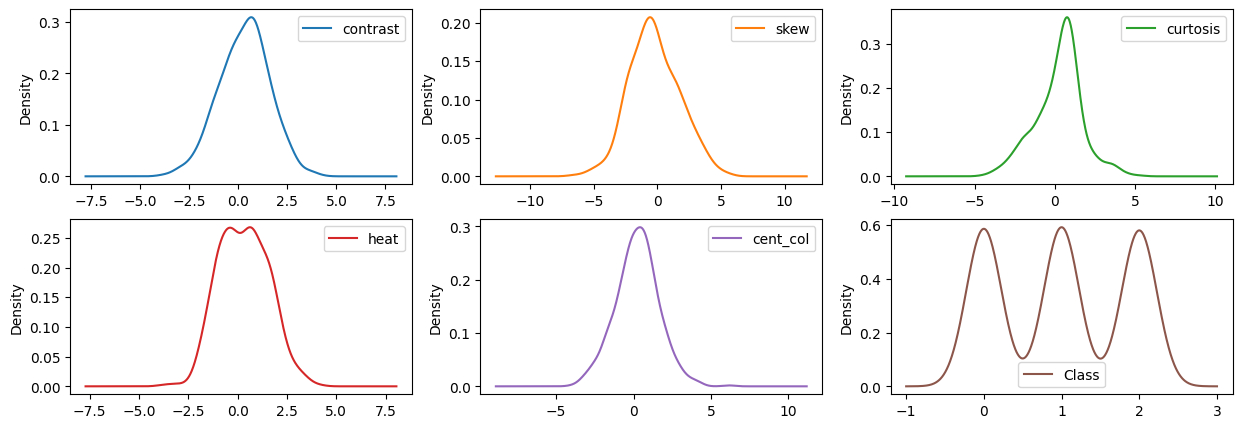

In [ ]:
df.plot(kind='density', subplots=True, layout=(2,3), figsize=(15, 5), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 33. Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method.
<br/>Note that the data frame currently includes the labels as well.

In [ ]:
from sklearn.model_selection import train_test_split

data = df.values

#x is the input features and y is the output label
X = data[:, :-1]  # all the columns correspond to the features except the last one
y = data[:, -1]  # the last column corresponds to the label

# we split the data 20% 80% by random state 25
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=33)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(480, 5) (120, 5) (480,) (120,)


Implement the functions below. <br/>Both get test data $X\in\mathbb{R}^{n\times d}$ and returns the predicted classes (vector sized n), but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [ ]:


#function to calculate the mean and covariance assuming that they are correlated
def calculate_parameters_gaussian(X, y):
    classes = np.unique(y)
    parameters = {}
    for cls in classes:
        X_cls = X[y == cls]
        mean = np.mean(X_cls, axis=0)
        cov = np.cov(X_cls.T)#covariance matrix
        parameters[cls] = (mean, cov)
    return parameters

#function to calculate the mean and variance assuming that they are not correlated
def calculate_parameters_naive(X, y):
    classes = np.unique(y)
    parameters = {}
    for cls in classes:
        X_cls = X[y == cls]
        mean = np.mean(X_cls, axis=0)
        var = np.var(X_cls, axis=0)#variance
        parameters[cls] = (mean, var)
    return parameters

#function to calculate the gaussian density function assuming that the features are not correlated
def density_naive(x, mean, var):
    #return the equation of the naive gaussian density
    return 1 / np.sqrt(2 * np.pi * var) *  np.exp(-(x - mean) ** 2 / (2 * var))

#function to calculate the gaussian density function assuming that the features are correlated
def density_gaussian(x, mean, cov):
    size = len(x)
    epsilon = 1e-9
    cov += np.eye(size) * epsilon #multiply the identity matrix by epsilon and add it to the covariance matrix to avoid singular matrix
    det = np.linalg.det(cov)#determinant of the covariance matrix
    diff = x - mean #difference between the feature vector and the mean
    inverse = np.linalg.inv(cov)
    #return the equation of the gaussian density
    return 1 / (np.power((2 * np.pi), float(size) / 2) * np.sqrt(det)) * np.exp(-0.5 * (np.dot(np.dot(diff.T, inverse), diff)))


def classify_point_gaussian_bayes(test_data):
    params_full = calculate_parameters_gaussian(x_train, y_train)

    classes = np.array(list(params_full.keys()))
    likelihoods = []
    for i in classes:
        mean, cov = params_full[i]
        likelihood = np.apply_along_axis(lambda x: density_gaussian(x, mean, cov), 1, test_data)
        likelihoods.append(likelihood)
    likelihoods = np.array(likelihoods)
    pred = classes[np.argmax(likelihoods, axis=0)]
    return pred
#params_full = calculate_parameters_gaussian(x_train, y_train)
#params_naive = calculate_parameters_naive(x_train, y_train)

def classify_point_gaussian_naive_bayes(test_data):
    params_naive = calculate_parameters_naive(x_train, y_train)

    classes = np.array(list(params_naive.keys()))
    likelihoods = []
    for i in classes:
        mean, var = params_naive[i]
        likelihood = np.prod(density_naive(test_data, mean, var), axis=1)
        likelihoods.append(likelihood)
    likelihoods = np.array(likelihoods)
    pred = classes[np.argmax(likelihoods, axis=0)]
    return pred

For both GB and GNB, we will look at train vs test. Answer the following:
- Which model achieved better learning? Why?
- Could the other model be sometimes better? How, for example?

<font color='red'>Write here your answers and explain</font>
<br/>Hint: Use the next section, for visualization the correlation matrix on the train.
<br/>
<br/>
   <font color='red'> As we can see from the results GB achived better learning because of the higher train and test accuracy rate than GNB the reason being that GB considerd the correlation between the features wich gives more precise predictionss when the features are correlated wich in our case they are.
    GNB could sometimes bet better like when the dataset is small GNB simplifies the model and reduces overfitting .</font>


In [ ]:
# Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(x_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.952083  0.852083
test   0.941667  0.833333


Its not enough! We want to get even better test results. <br/>
Please look at the train correlation matrix.
- Choose one feature to remove and explain why you chose it.
- If we continue to remove features, what do you expect to happend with the train error?

<font color='red'>Write here your answers and explain them</font><br/>

<font color='red'> if we look at the correlation matrix we can see the second(skey) the the fifth feature are the most correclated(cent_col) so one of those features is the feature that we should remove after to trying to remove each of the features we got the better result removing cent_col
removing a couple features might can reduce overfitting if the features are correlated wich would help reduce the train error but removing too many features would result in loosing too much information wich would result in underfitting and inaccurate predictions </font>

In [ ]:


# Calculate the correlation matrix
correlation_matrix = np.corrcoef(x_train.T)
print(correlation_matrix)

#if we look at the the corelatoin matrx we can see that feature 2 and feature 5 are the most corelated features
X_reduced = np.delete(X, 4, axis=1)

x_train, x_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, stratify=y, random_state=33)
#params_naive = calculate_parameters_naive(x_train, y_train)
#params_full = calculate_parameters_gaussian(x_train, y_train)



[[ 1.          0.46911339  0.2517404   0.39833881 -0.26523573]
 [ 0.46911339  1.         -0.56049324  0.26678033 -0.91935381]
 [ 0.2517404  -0.56049324  1.         -0.33079076  0.46451021]
 [ 0.39833881  0.26678033 -0.33079076  1.         -0.16310369]
 [-0.26523573 -0.91935381  0.46451021 -0.16310369  1.        ]]


Adjust the data according to your decision and print again the train and test for both models.

In [ ]:
# Change here the train and the test according to the feature you chose to remove

dict1 = {'GB': [], 'GNB': []}

accs = classify_point_gaussian_bayes(x_train)
dict1['GB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_bayes(x_test)
dict1['GB'].append(np.count_nonzero(accs == y_test) / len(y_test))

accs = classify_point_gaussian_naive_bayes(x_train)
dict1['GNB'].append(np.count_nonzero(accs == y_train) / len(y_train))

accs = classify_point_gaussian_naive_bayes(x_test)
dict1['GNB'].append(np.count_nonzero(accs == y_test) / len(y_test))

df = pd.DataFrame(dict1, columns=['GB', 'GNB'], index=['train', 'test'])
print(df)

             GB       GNB
train  0.952083  0.845833
test   0.941667  0.866667


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the lectures.

In [ ]:
# Essential for the visualization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

(8178, 4)


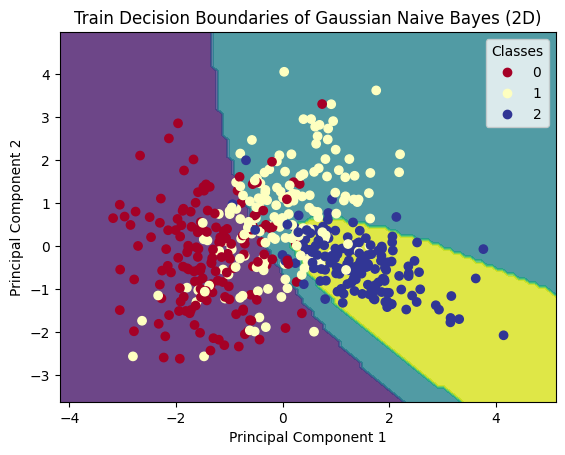

In [ ]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

(7031, 4)


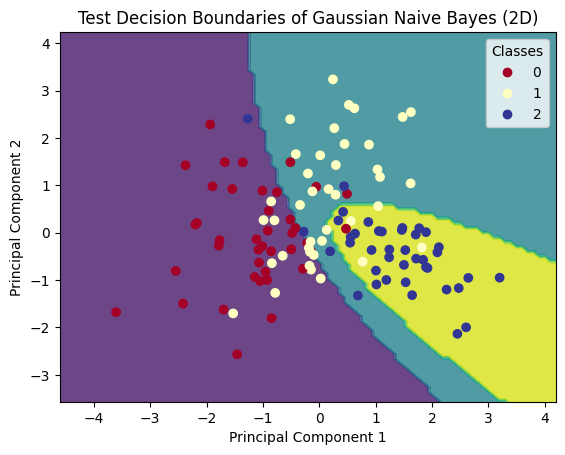

In [ ]:
#@title Train Decision Boundaries of Gaussian Naive Bayes (2D)

from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(x_test)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = classify_point_gaussian_naive_bayes(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Naive Bayes (2D)')
plt.show()

## Question 2 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict an emotion by description. <br/>
You will have to classify the sentences into 6 categories, <b>but could be any number.</b><br/>
The categories are {'sadness', 'joy', 'love', 'fear', 'anger', 'ambiguous'}. <br/>

<b>Warning:</b> I haven't personally looked at all the data here. Even though the data is taken from a ML databases site, accept my apologies if there are any offensive sentence.


import libarires

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [ ]:
def readTrainData(file_name):
    # Read the data
    df = pd.read_csv(file_name)
    texAll = df['text'].apply(lambda x: x.split()).tolist()    #converting the words to list in each entry
    lbAll = df['label'].tolist()                               #putting lables in list
    voc = set(word for tweet in texAll for word in tweet)      #set that contains all unique words in document
    cat = set(lbAll)                                           #set that contains each unique labels in document

    return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [ ]:
from collections import Counter

def learn_NB_text():
    # Use the variables from the previous cell
    global texAll_train, lblAll_train, voc, cat

    # Initialize the class-conditional probabilities matrix and the class priors vector
    Pw = {word: {category: 1 for category in cat} for word in voc}  # Initialize with 1 for Laplace smoothing
    P = Counter(lblAll_train)

    # Calculate the total number of words in each class
    total_words_in_class = {category: 0 for category in cat}
    for text, label in zip(texAll_train, lblAll_train):
        total_words_in_class[label] += len(text)

    # Calculate the class-conditional probabilities
    for text, label in zip(texAll_train, lblAll_train):
        for word in text:
            if word in voc:
                Pw[word][label] += 1

    for word in Pw:
        for category in Pw[word]:
            Pw[word][category] /= (total_words_in_class[category] + len(voc))  # Apply Laplace smoothing

    # Calculate the class priors
    total_documents = len(lblAll_train)
    for category in P:
        P[category] /= total_documents

    return Pw, P

Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [ ]:
import math

def ClassifyNB_text(Pw, P):
    # Use the variables from the previous cell
    global texAll_test, lblAll_test

    # Initialize the list of predicted labels
    predicted_labels = []

    # Classify each document
    for text in texAll_test:
        # Calculate the log probability of each class
        log_probabilities = {category: math.log(P[category]) for category in P}
        for word in text:
            if word in Pw:
                for category in Pw[word]:
                    log_probabilities[category] += math.log(Pw[word][category])

        # Choose the class with the highest log probability
        predicted_label = max(log_probabilities, key=log_probabilities.get)
        predicted_labels.append(predicted_label)

    # Calculate the success rate
    success_rate = sum(predicted == true for predicted, true in zip(predicted_labels, lblAll_test)) / len(lblAll_test)

    return success_rate

Read the files

In [ ]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)


Train the model, classify it on the test and report the success rate

In [ ]:
Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)

0.7665


## Question 3 - KNN
You want to detect stars into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [ ]:
# Implement here

# Load the data
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv')

# Print the first three rows
print(df.head(3))

   Temperature       L       R    A_M Color Spectral_Class  Type
0         3068  0.0024  0.1700  16.12   Red              M     0
1         3042  0.0005  0.1542  16.60   Red              M     0
2         2600  0.0003  0.1020  18.70   Red              M     0


Convert categorial features to discerete values

In [ ]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>
<font color='red'>Write here your answer and explain it</font>

<font color='red'>The Mahalanobis Metric here works better thats because we can see in the correlation matrix that the features are strongly correlated
which we learned in the lecture that the Euclidean metric wont give right results and the Mahalanobis metric is better. </font>




In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

                Temperature         L         R       A_M     Color  \
Temperature        1.000000  0.393404  0.064216 -0.420261  0.535934   
L                  0.393404  1.000000  0.526516 -0.692619  0.199249   
R                  0.064216  0.526516  1.000000 -0.608728 -0.062509   
A_M               -0.420261 -0.692619 -0.608728  1.000000 -0.352271   
Color              0.535934  0.199249 -0.062509 -0.352271  1.000000   
Spectral_Class     0.527404  0.409473  0.001467 -0.433673  0.701516   
Type               0.411129  0.676845  0.660975 -0.955276  0.409732   

                Spectral_Class      Type  
Temperature           0.527404  0.411129  
L                     0.409473  0.676845  
R                     0.001467  0.660975  
A_M                  -0.433673 -0.955276  
Color                 0.701516  0.409732  
Spectral_Class        1.000000  0.477165  
Type                  0.477165  1.000000  


Split the data to 90% train and 10% test, with random state 42. <br/>
Afterwards, split the train into 80% train and 20% validation, also with random state of 42<br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [ ]:
# Implement here

# Assuming 'Type' is your target variable
X = df.drop('Type', axis=1)
y = df['Type']

# Split the data into 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Further split the train data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Check the balance of the splits
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Type
5    0.168605
1    0.168605
0    0.168605
2    0.168605
4    0.162791
3    0.162791
Name: proportion, dtype: float64
Type
4    0.181818
3    0.181818
5    0.159091
0    0.159091
1    0.159091
2    0.159091
Name: proportion, dtype: float64
Type
2    0.166667
1    0.166667
0    0.166667
5    0.166667
3    0.166667
4    0.166667
Name: proportion, dtype: float64


Implement the function 'Euclidian'. <br/>
This function gets train and test datasets ($m\times d, n\times d$) and returns the distance metric sized $m \times n$, based on euclidian distance metric


In [ ]:
def Euclidean(test, data):
    # Reshape test and data for broadcasting
    test = test[:, np.newaxis]
    # Calculate Euclidean distances
    distances = np.sqrt(np.sum((test - data)**2, axis=2))
    return distances

def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)

  # Calculate the Mahalanobis distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [ ]:
def kNN_classify(data, labels, test, k, p=None, metric='Euclidean'):

    # arguments = (test, data, p) if metric == 'Minkowski' else (test, data)
    # distances = eval(f'{metric}(*arguments)')   #returns np[][] |test| X |data| by the given metric.

    #first we make the data as numpy array
    # data = np.asarray(data)
    # labels = np.asarray(labels)
    # test = np.asarray(test)

    if(metric=='Minkowski'):
        distances = Minkowski(test, data, p)
    if metric == 'Mahalanobis':
        distances = Mahalanobis(test, data)
    elif metric == 'Euclidean':
        distances = Euclidean(test, data)

    # give me the k index of the k nearst neighbors
    k_nearest_neighbors_indices = np.argsort(distances, axis=1)[:, :k]

    # give me the k labels of the k nearst neighbors
    k_nearest_neighbors_labels = labels[k_nearest_neighbors_indices]

    #perdict
    predictions = np.array([np.argmax(np.bincount(labels)) for labels in k_nearest_neighbors_labels])

    return predictions.flatten()

In [ ]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/emotions_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)


Look at the plots for different k values. Note that the Mahalanobis distance metric is already implemented to you above. <br/>Run the following code and compare the performance of Mahalanobis vs Euclidian, specifically as function of k. <br/>
<font color='red'>Write here your answer and explain it</font>

<font color='red'>We can see from the 2 plots that the Manhabolis distance perform better for K's 1-35 but then the Euclidian distance may perform better
accuracy according to the graph from 35 and upwards. </font>


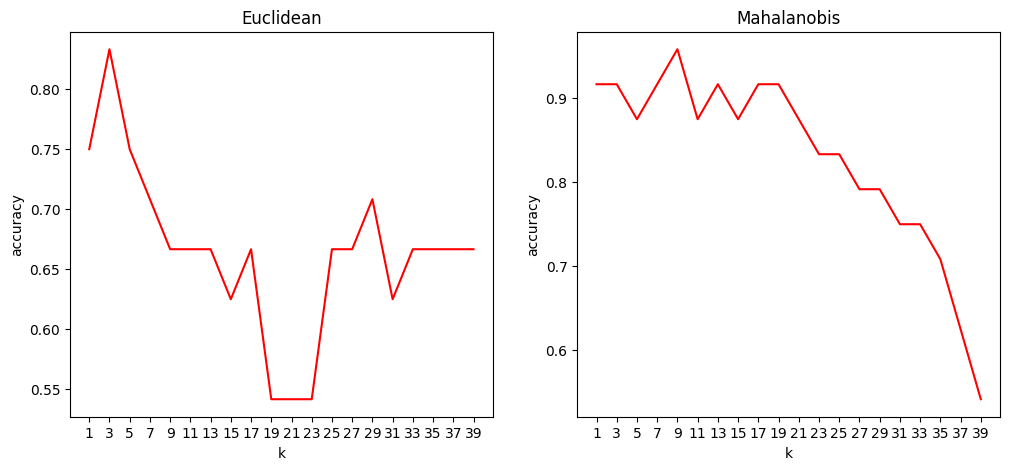

In [ ]:
metrics = ['Euclidean', 'Mahalanobis']
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, metric in enumerate(metrics):

  ks = np.arange(1, 41, 2)
  accs = []
  p=2 # for testing
  for k in ks:
    c = kNN_classify(X_train.values, y_train.values, X_test.values, k,p, metric)
    accuracy= np.mean(c==y_test)
    accs.append(accuracy)

  axs[idx % 2].plot(ks, accs, color='red')
  axs[idx % 2].set_xlabel('k')
  axs[idx % 2].set_ylabel('accuracy')
  axs[idx % 2].set_title(metric)
  axs[idx % 2].set_xticks(ks)
plt.show()

Now, we implement the $L_p$ norm distance metric. Reminder:
$$ d(x,y)=||x-y||_p=\left(\sum_{i=1}^d |x_i-y_i|^p\right)^{\frac{1}{p}} $$
Remark: $L_1$ is the Manhattan distance and $L_2$ is the Euclidian.

In [ ]:
# def Minkowski(test, data, p):
#     return np.power(np.sum(np.power(np.abs(data - test), p), axis=0), 1/p)



def Minkowski(test, data, p):

    # Reshape test and data for broadcasting
    test = test[:, np.newaxis, :]
    data = data[np.newaxis, :, :]

    # Calculate Lp norm distances according to the formula
    distances = np.sum(np.abs(test - data) ** p, axis=2) ** (1/p)

    return distances

Find the hyperparameter p that fits best to this problem (between 1-10)

In [ ]:
# Implement here

# we go over all the P's from 1-to 10 and in each we also check the k's from 1-40
ps = np.arange(1, 11)
ks = np.arange(1, 41, 2)
best_p, best_k, best_acc = None, None, 0

for p in ps:
    for k in ks:
        predictions = kNN_classify(X_train.values, y_train.values, X_test.values, k, p, metric='Minkowski')
        accuracy= np.mean(predictions==y_test)



        if accuracy > best_acc:
            best_p, best_k, best_acc = p, k, accuracy

print(f"The best p is {best_p},with the best k is {best_k}, with an accuracy of {best_acc}")

The best p is 1,with the best k is 3, with an accuracy of 0.9166666666666666


For that p, print the accuracy on the test as function of k. Is it really better  than the first two matrices? <br/>
<font color='red'>Write here your answer and explain it</font>

<font color='red'>We can see that for the best p which is 1 ,still the Manahbolis metric preform the best results according to the graph. but the Minowski for
p=1 is better than the Euclidian Metric

</font>

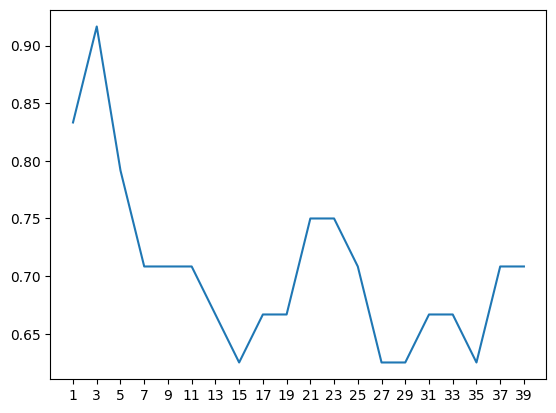

In [ ]:
ks = np.arange(1, 41, 2)
accs = []
best_p = 1       # You may change the usage of p according to your previous implementation

for k in ks:
    c = kNN_classify(X_train.values, y_train.values, X_test.values, k, best_p , 'Minkowski')
    accuracy= np.mean(c==y_test)
    accs.append(accuracy)   # Implement here

plt.plot(ks, accs)
plt.xticks(ks)
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We are going to classify the fashion MNIST data.<br/>
First, load the the train and test from:
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv
- https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv

Seconly, convert it to numpy and obtain the train and test data & labels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_url = 'https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_train.csv'
test_url = 'https://sharon.srworkspace.com/ml/datasets/hw1/fashion-mnist_test.csv'

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

print("Train Data Columns:", train_df.columns)
print("Test Data Columns:", test_df.columns)

X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values


X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

Train Data Columns: Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
Test Data Columns: Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


dispaly some random image

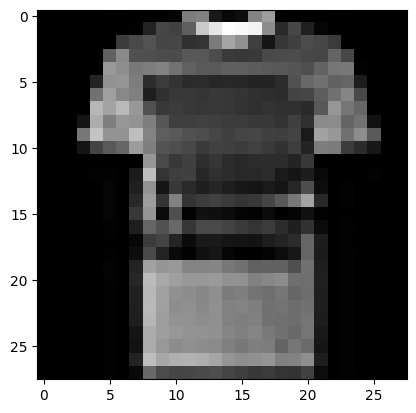

In [ ]:
idx = np.random.randint(len(X_train))
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.show()

Use some google to search for appropriate distance metric that should classify correctly images. From what you read, explain yourselves, why is it a good distance metric?<br/>
<font color='red'>Write here your answer and explain it
<br/>From what we read we found that the euclidean distance metric is a good distance metric becuase of its simplimcity and because the MNIST dataset is typically represented in high-dimensional space. Euclidean distance is effective in these spaces because it maintains the geometric properties of the space, ensuring that similar images are close to each other.other metricss may be better praticular cases but euclidean is very good overall.</font>

Now, use the sklearn package of KNN with the metric you chose and print a graph of accuracy on the test, as function of k.<br/>
Were you correct?

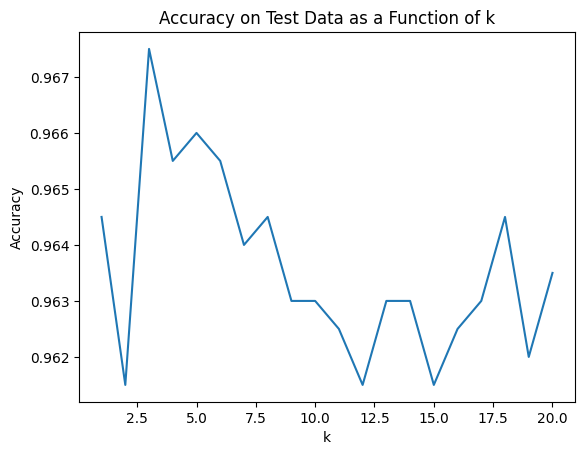

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values
k_values = np.arange(1, 21)

# Initialize an empty list to store the accuracies
accuracies = []

# Iterate over each k value
for k in k_values:
    # Create a KNN classifier with the Euclidean metric
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy and append it to the list
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

# Plot the graph of accuracy vs. k
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Data as a Function of k')
plt.show()
# Implement here

## Question 4 - Parzen Windoes
See attached PDF in Moodle